# 資料取得

#### 1. OPEN DATA
#### 2. API
#### 3. WEB-SCRAPING

## 1. OPEN DATA

1. 直接下載公開資料


政府公開資料
https://data.gov.tw/

<img src="政府公開資料.png">

台北公開資料

http://data.taipei/opendata/datalist/datasetByFormat?oid=JSON

<img src="台北市公開資料.png">

新竹市政府公開資料

http://opendata.hccg.gov.tw/dataset

<img src="新竹市公開資料.png">

https://sheethub.com/data.taipei.gov.tw/%E8%87%BA%E5%8C%97%E5%B8%82%E4%BC%81%E6%A5%AD%E7%87%9F%E9%81%8B%E7%B8%BD%E9%83%A8%E5%88%86%E5%B8%83%E5%9C%96?page=1

## 2. API

應用程式介面（英語：Application Programming Interface，簡稱：API），
又稱為應用編程介面，就是軟體系統不同組成部分銜接的約定。

#### Twitter API 

An Overview of the Twitter API
There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data, it's also suitable for smaller-scale projects, research, and fun. Here are a few of the most notable APIs provided by Twitter:

Tweets: searching, posting, filtering, engagement, streaming etc.
Ads: campaign and audience management, analytics.
Direct messages (still in Beta): sending and receiving, direct replies, welcome messages etc.
Accounts and users (Beta): account management, user interactions.
Media: uploading and accessing photos, videos and animated GIFs.
Trends: trending topics in a given location.
Geo: information about known places or places near a location.
There are many more possibilities with the Twitter APIs, which are not included in this list. Twitter is also constantly expanding its range of services by adding new APIs from time to time, and updating existing ones.

https://www.youtube.com/watch?v=wlnx-7cm4Gg&list=PL5tcWHG-UPH2zBfOz40HSzcGUPAVOOnu1&index=1

https://developer.twitter.com/en/docs/basics/authentication/guides/access-tokens.html

In [114]:
import tweepy
consumer_key="consumer_key"
consumer_secret="consumer_secret"
access_token="access_token"
access_token_secret="access_token_secret"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [86]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        pass

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = StdOutListener(fetched_tweets_filename)
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class StdOutListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          

    def on_error(self, status):
        print(status)

 
if __name__ == '__main__':
 
    # Authenticate using config.py and connect to Twitter Streaming API.
    hash_tag_list = ["Boston"]
    fetched_tweets_filename = "tweets.txt"

    twitter_streamer = TwitterStreamer()
    twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)

{"created_at":"Thu Sep 27 09:28:22 +0000 2018","id":1045243742570131456,"id_str":"1045243742570131456","text":"Pop culture taught me that everyone in Boston is a second degree murderer, but I am now hip to the secret fact that\u2026 https:\/\/t.co\/xjtnm9CMmI","source":"\u003ca href=\"http:\/\/www.facebook.com\/twitter\" rel=\"nofollow\"\u003eFacebook\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":18197350,"id_str":"18197350","name":"Brian Graupner","screen_name":"dark_NES","location":"Boston, MA","url":"http:\/\/www.thegothsicles.com","description":"All will be well.","translator_type":"none","protected":false,"verified":false,"followers_count":1217,"friends_count":935,"listed_count":42,"favourites_count":310,"statuses_count":1713,"created_at":"Wed Dec 17 19:38:56 +0000 2008","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"

{"created_at":"Thu Sep 27 09:28:53 +0000 2018","id":1045243871754629120,"id_str":"1045243871754629120","text":"RT @kryptoinETF: Kryptoin CIO Speaks at Global Blockchain Conference in Boston \nTariq Ali Ashgar, Kryptoin's CIO, spoke this morning at the\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":887276291568914432,"id_str":"887276291568914432","name":"Janie Michelle","screen_name":"JanieMichellehg","location":"Lithuania","url":null,"description":"Janie Michelle Tennis","translator_type":"none","protected":false,"verified":false,"followers_count":2276,"friends_count":4679,"listed_count":5,"favourites_count":1330,"statuses_count":2762,"created_at":"Tue Jul 18 11:42:07 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"e

{"created_at":"Thu Sep 27 09:29:06 +0000 2018","id":1045243927798968320,"id_str":"1045243927798968320","text":"RT @TrashTalk_fr: Comme chaque ann\u00e9e.\n- Septembre : \u00ab\u00a0Eh mais l\u2019Est c\u2019est pas mal nan ?\u00a0\u00bb\n- Novembre : \u00ab\u00a0Ah bah vous voyez, l\u2019Est tient t\u00eat\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1423195218,"id_str":"1423195218","name":"Salim","screen_name":"murcielago221","location":"Valence, Espagne","url":null,"description":"#WadeCounty #AmuntValencia 21LVA, Donovan Mitchell enthusiast","translator_type":"regular","protected":false,"verified":false,"followers_count":458,"friends_count":238,"listed_count":45,"favourites_count":13137,"statuses_count":132321,"created_at

{"created_at":"Thu Sep 27 09:29:07 +0000 2018","id":1045243929032118272,"id_str":"1045243929032118272","text":"Remember this? Boston\u2019s only No.1 \u2018Amanda,\u2019 entered the Billboard Hot 100 #OTD 1986 https:\/\/t.co\/0SP871x2iN","source":"\u003ca href=\"http:\/\/www.kongalytics.com\" rel=\"nofollow\"\u003eKongalytics_hub \u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":585466175,"id_str":"585466175","name":"uDiscover Music","screen_name":"uDiscoverMusic","location":"Worldwide","url":"https:\/\/www.udiscovermusic.com","description":"Dig deeper into the music you love...","translator_type":"none","protected":false,"verified":true,"followers_count":20746,"friends_count":1906,"listed_count":383,"favourites_count":6456,"statuses_count":59087,"created_at":"Sun May 20 07:58:23 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled"

{"created_at":"Thu Sep 27 09:29:27 +0000 2018","id":1045244013639553029,"id_str":"1045244013639553029","text":"RT @Velherro: T\u00fa a Boston y yo a California https:\/\/t.co\/r0VviI0DU9","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":364261539,"id_str":"364261539","name":"RVH","screen_name":"Velherro","location":null,"url":null,"description":"Lo que ves es lo que hay, sin dobleces. Responsable social corporativa . Coordinadora de formaci\u00f3n, maestra especialista en lenguas extranjeras.","translator_type":"none","protected":false,"verified":false,"followers_count":4523,"friends_count":2975,"listed_count":30,"favourites_count":56208,"statuses_count":55046,"created_at":"Mon Aug 29 13:46:29 +0000 2011","utc_offset":null,"time_zone"

{"created_at":"Thu Sep 27 09:29:48 +0000 2018","id":1045244102508392448,"id_str":"1045244102508392448","text":"RT @kryptoinETF: Kryptoin CIO Speaks at Global Blockchain Conference in Boston \nTariq Ali Ashgar, Kryptoin's CIO, spoke this morning at the\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":116723529,"id_str":"116723529","name":"Tribe BTC","screen_name":"tribebtc","location":"England, United Kingdom","url":null,"description":"The Tribe BTC","translator_type":"none","protected":false,"verified":false,"followers_count":2055,"friends_count":141,"listed_count":6,"favourites_count":1342,"statuses_count":2753,"created_at":"Tue Feb 23 11:37:10 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled"

{"created_at":"Thu Sep 27 09:30:02 +0000 2018","id":1045244162357035008,"id_str":"1045244162357035008","text":"[9\/27]: Matt Sydal def. Ryusuke via submission after a boston crab (25:20)","source":"\u003ca href=\"http:\/\/lolwrestling.com\" rel=\"nofollow\"\u003eLOLWrestling Tweet Bot\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":773572008735019008,"id_str":"773572008735019008","name":"Wrestling Results","screen_name":"rasslin_results","location":"A web server","url":"http:\/\/www.lolwrestling.com","description":"Legitimately obtained professional wrestling results generated by a robot.\n\nBuilt by @lolwrestling","translator_type":"none","protected":false,"verified":false,"followers_count":379,"friends_count":1,"listed_count":7,"favourites_count":16,"statuses_count":63427,"created_at":"Wed Sep 07 17:21:53 +0000 2016","utc_offset":null,"

{"created_at":"Thu Sep 27 09:30:07 +0000 2018","id":1045244181520818176,"id_str":"1045244181520818176","text":"RT @TrashTalk_fr: Comme chaque ann\u00e9e.\n- Septembre : \u00ab\u00a0Eh mais l\u2019Est c\u2019est pas mal nan ?\u00a0\u00bb\n- Novembre : \u00ab\u00a0Ah bah vous voyez, l\u2019Est tient t\u00eat\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1405969548,"id_str":"1405969548","name":".","screen_name":"Thib_auc","location":"Lyon, France","url":null,"description":"#JazzNation","translator_type":"none","protected":false,"verified":false,"followers_count":426,"friends_count":428,"listed_count":35,"favourites_count":988,"statuses_count":39299,"created_at":"Sun May 05 20:10:16 +0000 2013","utc_offset":null,"time_zone":null

{"created_at":"Thu Sep 27 09:30:17 +0000 2018","id":1045244225837813761,"id_str":"1045244225837813761","text":"Boston, MA Forecast | Weather Underground https:\/\/t.co\/Bi070Dr1Hk","source":"\u003ca href=\"http:\/\/www.facebook.com\/twitter\" rel=\"nofollow\"\u003eFacebook\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":146541389,"id_str":"146541389","name":"Lake HVAC","screen_name":"lakehvac","location":"Stoneham, MA","url":"http:\/\/www.lakehvac.com","description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":14,"friends_count":8,"listed_count":0,"favourites_count":1,"statuses_count":2687,"created_at":"Fri May 21 18:01:48 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profile_backgro

{"created_at":"Thu Sep 27 09:30:31 +0000 2018","id":1045244282037243905,"id_str":"1045244282037243905","text":"\u00a1Nuestros #Alumni no se detienen! Esta semana @Lauragesc presenta su proyecto emprendedor en el @babson de #Boston,\u2026 https:\/\/t.co\/Q35OIqPL8H","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/www.hootsuite.com\" rel=\"nofollow\"\u003eHootsuite\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":109600677,"id_str":"109600677","name":"ESIC","screen_name":"ESICEducation","location":"Espa\u00f1a","url":"http:\/\/www.esic.edu","description":"Escuela de Negocios y Centro Universitario l\u00edder en marketing y direcci\u00f3n empresarial con m\u00e1s 50 a\u00f1os de experiencia y m\u00e1s de 60.000 antiguos alumnos.","translator_type":"none","protected":false,"verified":true,"followers_count":23241,"friends_count":8

{"created_at":"Thu Sep 27 09:30:34 +0000 2018","id":1045244294804774913,"id_str":"1045244294804774913","text":"Gui\u00f1o de Irving a los Celtics: \"Estamos jod... bien en Boston\" https:\/\/t.co\/UlpQKjxKC4","source":"\u003ca href=\"https:\/\/ifttt.com\" rel=\"nofollow\"\u003eIFTTT\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":786480505814339584,"id_str":"786480505814339584","name":"Carlos Mendez","screen_name":"carllooss_mnddz","location":null,"url":null,"description":"\u201cSoy un amante enpedernido de la literatura. Mis autores favoritos son Paulo Cohelo y Garc\u00eda Marques. La vida es un sue\u00f1o\u201d","translator_type":"none","protected":false,"verified":false,"followers_count":62,"friends_count":97,"listed_count":0,"favourites_count":0,"statuses_count":11072,"created_at":"Thu Oct 13 08:15:39 +0000 2016","utc_offset":null,"ti

{"created_at":"Thu Sep 27 09:30:47 +0000 2018","id":1045244352157679624,"id_str":"1045244352157679624","text":"Went to Boston with the Crew | Steve\u2019s Vlogs \nPublished on Sep 26, 2018\nhttps:\/\/t.co\/Mwpp6uvvma\n\n@steve70870","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":589884287,"id_str":"589884287","name":"Joseph Paul Blough","screen_name":"JPBlough","location":"Pennsylvania, USA","url":null,"description":"Blough Rhymes with how.","translator_type":"none","protected":false,"verified":false,"followers_count":542,"friends_count":1817,"listed_count":175,"favourites_count":80192,"statuses_count":150831,"created_at":"Fri May 25 10:40:39 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled":false,"

{"created_at":"Thu Sep 27 09:30:57 +0000 2018","id":1045244391101796352,"id_str":"1045244391101796352","text":"RT @digitallancs: We're supporting Code for Lancaster! https:\/\/t.co\/3eylSq3CgQ is a volunteer Civic Technology meetup. Inspired by Code for\u2026","source":"\u003ca href=\"http:\/\/tapbots.com\/tweetbot\" rel=\"nofollow\"\u003eTweetbot for i\u039fS\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":18551003,"id_str":"18551003","name":"Magma Digital Ltd","screen_name":"magma_digital","location":"Preston, Lancashire, UK","url":"http:\/\/www.magmadigital.co.uk","description":"Software, Development & Consultancy! \nWe create & improve software & lead organisational change @phpcodemonkey @priscillacoates","translator_type":"none","protected":false,"verified":false,"followers_count":1522,"friends_count":80,"listed_count":82,"favourites

{"created_at":"Thu Sep 27 09:31:24 +0000 2018","id":1045244503559467010,"id_str":"1045244503559467010","text":"about-usa:Boston - Massachusetts - USA (by\u00a0Michael Muraz) \u2747\ufe0f... https:\/\/t.co\/yoJaeQvxE3","source":"\u003ca href=\"https:\/\/ifttt.com\" rel=\"nofollow\"\u003eIFTTT\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1854475308,"id_str":"1854475308","name":"Boost Your Good Vibes","screen_name":"Be4Happylife","location":null,"url":"https:\/\/boostyourgoodvibes.tumblr.com\/","description":"\u201cHappiness is having a large, loving, caring, close-knit family in another city.\u201d George Burns \ud83e\udd1c","translator_type":"none","protected":false,"verified":false,"followers_count":4691,"friends_count":1065,"listed_count":28,"favourites_count":0,"statuses_count":4762,"created_at":"Wed Sep 11 14:33:36 +0000 2013","utc_

{"created_at":"Thu Sep 27 09:31:33 +0000 2018","id":1045244542751043584,"id_str":"1045244542751043584","text":"FULL: Isiah Thomas &amp; Kevin McHale on Boston Celtics 2018-19 NBA Preview: Brad Stevens, Kyrie Irving https:\/\/t.co\/6eN3ThZlUm","source":"\u003ca href=\"http:\/\/twibble.io\" rel=\"nofollow\"\u003eTwibble.io\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3246342022,"id_str":"3246342022","name":"NBA News Videos","screen_name":"NBANewsVideos","location":null,"url":"http:\/\/watchbasketballvideos.com","description":"NBA basketball news, videos, articles, photos, and polls. DM for business inquires\/promotions - Ads\/Rts","translator_type":"none","protected":false,"verified":false,"followers_count":36211,"friends_count":16152,"listed_count":36,"favourites_count":2773,"statuses_count":11011,"created_at":"Mon May 11 13:41:22 +0000

{"created_at":"Thu Sep 27 09:31:45 +0000 2018","id":1045244594529751046,"id_str":"1045244594529751046","text":"@TerryFoster971 ..... media covers up stories all the time to protect its sources..   case in point, the Adrian Dar\u2026 https:\/\/t.co\/XgdBz9A2Y5","display_text_range":[16,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1045244310709567489,"in_reply_to_status_id_str":"1045244310709567489","in_reply_to_user_id":518514497,"in_reply_to_user_id_str":"518514497","in_reply_to_screen_name":"Al_Czervik1","user":{"id":518514497,"id_str":"518514497","name":"Al Czervik","screen_name":"Al_Czervik1","location":"Macomb, MI","url":"http:\/\/www.sunshineandhappiness.com","description":"1991, 1994, and 2018 DFS Player of the Year.  Co-Host of Sanford and Son.   Believer in UFOs, 9\/11 Conspiracy, and Mickey Dolenz.  I love all people.","translator_type":"none","protected"

{"created_at":"Thu Sep 27 09:32:07 +0000 2018","id":1045244685051154432,"id_str":"1045244685051154432","text":"RT @kryptoinETF: Kryptoin CIO Speaks at Global Blockchain Conference in Boston \nTariq Ali Ashgar, Kryptoin's CIO, spoke this morning at the\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":960468308255498241,"id_str":"960468308255498241","name":"Yura Rydenko","screen_name":"YuraRydenko","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1224,"friends_count":1930,"listed_count":4,"favourites_count":2419,"statuses_count":2656,"created_at":"Mon Feb 05 11:01:04 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"ru","contributo

{"created_at":"Thu Sep 27 09:32:23 +0000 2018","id":1045244752919228416,"id_str":"1045244752919228416","text":"RT @kryptoinETF: Kryptoin ETF Systems CIO to Speak at Global Blockchain Conference in Boston \nKryptoin ETF Systems\u2019 CIO has been scheduled\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":960468308255498241,"id_str":"960468308255498241","name":"Yura Rydenko","screen_name":"YuraRydenko","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":1224,"friends_count":1930,"listed_count":4,"favourites_count":2421,"statuses_count":2658,"created_at":"Mon Feb 05 11:01:04 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"ru","contri

{"created_at":"Thu Sep 27 09:32:27 +0000 2018","id":1045244769377628160,"id_str":"1045244769377628160","text":"Orioles beat Boston Red Sox 10 to 3 in double header game 2!! Great win for orioles!!","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":155232721,"id_str":"155232721","name":"Dakota Khan","screen_name":"dkdcsportsfan","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":78,"friends_count":433,"listed_count":0,"favourites_count":271,"statuses_count":2981,"created_at":"Sun Jun 13 14:55:02 +0000 2010","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profi

{"created_at":"Thu Sep 27 09:32:46 +0000 2018","id":1045244849576972290,"id_str":"1045244849576972290","text":"#unique and #rare opp\u2019y!!\n\nIn late Oct, early Nov, 2018 we are offering these great #cleanlanguage #cleanforteams t\u2026 https:\/\/t.co\/PpF210PgFA","source":"\u003ca href=\"http:\/\/tapbots.com\/tweetbot\" rel=\"nofollow\"\u003eTweetbot for i\u039fS\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":83642518,"id_str":"83642518","name":"Andrea Chiou","screen_name":"andreachiou","location":"Reston, VA USA","url":"http:\/\/www.connections-at-work.com","description":"Lean\/Agile Coaching. Agendashift. \n\n*Clean* Interviewing and Facilitation for Teams. (ask me)\n\nIndependent. Centered. Welcoming. Curious Listener. Multi-lingual","translator_type":"none","protected":false,"verified":false,"followers_count":2180,"friends_count":

{"created_at":"Thu Sep 27 09:32:54 +0000 2018","id":1045244882351259651,"id_str":"1045244882351259651","text":"@wsreports Springfield will miss you. I take Provel to Boston every time I go to see our daughter.","display_text_range":[11,98],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1045039440870150145,"in_reply_to_status_id_str":"1045039440870150145","in_reply_to_user_id":1115684959,"in_reply_to_user_id_str":"1115684959","in_reply_to_screen_name":"wsreports","user":{"id":2752096250,"id_str":"2752096250","name":"Kathy Munzinger","screen_name":"KathyMunzinger","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":126,"friends_count":175,"listed_count":0,"favourites_count":207,"statuses_count":172,"created_at":"Thu Aug 21 13:11:01 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"la

{"created_at":"Thu Sep 27 09:33:12 +0000 2018","id":1045244959937507328,"id_str":"1045244959937507328","text":"@starcrosswolf @gonv_survival How can anyone not think this  #Swetnick story is very strange? Check out yesterday's\u2026 https:\/\/t.co\/ejnYLSrge3","display_text_range":[30,140],"source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1045037521300647936,"in_reply_to_status_id_str":"1045037521300647936","in_reply_to_user_id":92408522,"in_reply_to_user_id_str":"92408522","in_reply_to_screen_name":"starcrosswolf","user":{"id":2250704618,"id_str":"2250704618","name":"Mass  Appraisals","screen_name":"MassAdvisors","location":"USA","url":null,"description":"Probate Estate & AMC Appraisals supports #Military #Police #ICE #Workingclass #Middleclass #USworkers #KatesLaw #BacktheBlue  #IndependentVoter take #megapill","translator_type":"regular","protected":false,"verified":false,"followers_count

{"created_at":"Thu Sep 27 09:33:19 +0000 2018","id":1045244989637357568,"id_str":"1045244989637357568","text":"Eruption of Hawaii\u2019s Kilauea volcano - The Boston Globe https:\/\/t.co\/VVhf6ER363","source":"\u003ca href=\"http:\/\/www.facebook.com\/twitter\" rel=\"nofollow\"\u003eFacebook\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":434485662,"id_str":"434485662","name":"matthieu lequimener","screen_name":"hindoubou","location":"Paris, France","url":"http:\/\/hindoubou.photography","description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":23,"friends_count":127,"listed_count":0,"favourites_count":0,"statuses_count":100,"created_at":"Sun Dec 11 22:46:19 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"fr","contributors_enabled":false,"is_translator":false,"profile_backg

{"created_at":"Thu Sep 27 09:33:45 +0000 2018","id":1045245098911584256,"id_str":"1045245098911584256","text":"RT @TrashTalk_fr: Comme chaque ann\u00e9e.\n- Septembre : \u00ab\u00a0Eh mais l\u2019Est c\u2019est pas mal nan ?\u00a0\u00bb\n- Novembre : \u00ab\u00a0Ah bah vous voyez, l\u2019Est tient t\u00eat\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":839802054721810433,"id_str":"839802054721810433","name":"kaizersoze","screen_name":"domlabine","location":"Konoha","url":null,"description":"Ne pas prendre les gens pour des cons.. mais ne pas oublier qu\u2019ils le sont","translator_type":"none","protected":false,"verified":false,"followers_count":78,"friends_count":259,"listed_count":0,"favourites_count":3990,"statuses_count"

{"created_at":"Thu Sep 27 09:33:48 +0000 2018","id":1045245109946773504,"id_str":"1045245109946773504","text":"\ud83d\udc9e Alex from Boston U just enrolled at Chive U (24 Photos) \ud83d\udc93 https:\/\/t.co\/DWtIAiaL5I","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1018095628881186816,"id_str":"1018095628881186816","name":"Vennie","screen_name":"koenenvennie44","location":"New York, NY","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":698,"friends_count":2512,"listed_count":0,"favourites_count":0,"statuses_count":816,"created_at":"Sat Jul 14 11:31:28 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_bac

{"created_at":"Thu Sep 27 09:34:08 +0000 2018","id":1045245195573514241,"id_str":"1045245195573514241","text":"On my way to Cambridge. Let\u2019s see how this South Boston traffic compares to the parkway, the expressway, the Schuyl\u2026 https:\/\/t.co\/dHyBCXIU6J","source":"\u003ca href=\"http:\/\/www.facebook.com\/twitter\" rel=\"nofollow\"\u003eFacebook\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":36500889,"id_str":"36500889","name":"T.J. Sharpe","screen_name":"tsharpe2","location":"Fort Lauderdale","url":"http:\/\/5pmsmwr.blogspot.com","description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":272,"friends_count":116,"listed_count":1,"favourites_count":25,"statuses_count":2103,"created_at":"Wed Apr 29 22:18:04 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contrib

{"created_at":"Thu Sep 27 09:34:26 +0000 2018","id":1045245269712031744,"id_str":"1045245269712031744","text":"RT @TJDhoops: Kyrie promising to never leave Boston? Shocking stuff. https:\/\/t.co\/9ZM84vjLRM","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":33744277,"id_str":"33744277","name":"S E N S E I   H U N C H O.","screen_name":"GOD_B0DY","location":"Smoking Trees in Belize.","url":"http:\/\/www.instagram.com\/__exzy__","description":"Professional shit talker. Part time Comedian. Retired rapper. Sports analyst. #GiantsPride #PinstripePride #Knicks #LakeShow #GoDucks #HalaMadrid #ForzaJuve","translator_type":"none","protected":false,"verified":false,"followers_count":917,"friends_count":635,"listed_count":42,"favourites_count":59

{"created_at":"Thu Sep 27 09:34:38 +0000 2018","id":1045245317745119233,"id_str":"1045245317745119233","text":"https:\/\/t.co\/kDWCFPNUQJ","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":258539624,"id_str":"258539624","name":"George The Greek","screen_name":"TheGreek60","location":null,"url":null,"description":"FSU, BS Economics.  Interests: Poker & Fantasy Sports.","translator_type":"none","protected":false,"verified":false,"followers_count":43,"friends_count":99,"listed_count":7,"favourites_count":5,"statuses_count":5247,"created_at":"Sun Feb 27 23:30:39 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profile_back

{"created_at":"Thu Sep 27 09:34:59 +0000 2018","id":1045245409319407618,"id_str":"1045245409319407618","text":"#NowPlaying Don't Look Back by Boston","source":"\u003ca href=\"https:\/\/samcloud.spacial.com\" rel=\"nofollow\"\u003eSAM Broadcaster Cloud\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1607098015,"id_str":"1607098015","name":"Lawrencehits.com","screen_name":"Lawrencehits","location":"Lawrence, ks","url":"http:\/\/Lawrencehits.com","description":"We play the HITS of the 90s, 80s, 70s and 60s. We also cover events and provide community information specific to Lawrence and Douglas County, Kansas.","translator_type":"none","protected":false,"verified":false,"followers_count":716,"friends_count":710,"listed_count":19,"favourites_count":256,"statuses_count":17045,"created_at":"Sat Jul 20 00:35:09 +0000 2013","utc_offset":null,"time

{"created_at":"Thu Sep 27 09:35:08 +0000 2018","id":1045245445046489088,"id_str":"1045245445046489088","text":"Les Performers des Grizzlies #2\n\nMarc Gasol\n\nM\u00eame en plein tanking de porc, le cadet du meilleur pote des fran\u00e7ais\u2026 https:\/\/t.co\/mUZTItIlwm","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1045245422334291968,"in_reply_to_status_id_str":"1045245422334291968","in_reply_to_user_id":973332758238986240,"in_reply_to_user_id_str":"973332758238986240","in_reply_to_screen_name":"TTFLab","user":{"id":973332758238986240,"id_str":"973332758238986240","name":"TrashTalkFantasyLab","screen_name":"TTFLab","location":"Trashtalk.co","url":"http:\/\/facebook.com\/ttflab","description":"Livescores, statistiques, classements, injury report, livetweet, histoire ,quiz.. Le #TTFLab\ud83d\udcca est le compte pour suivre l'actu de la #

{"created_at":"Thu Sep 27 09:35:16 +0000 2018","id":1045245477686456321,"id_str":"1045245477686456321","text":"@slashfilm @apple_sstrudel jadi train to boston","display_text_range":[11,47],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1044708401622605825,"in_reply_to_status_id_str":"1044708401622605825","in_reply_to_user_id":821193,"in_reply_to_user_id_str":"821193","in_reply_to_screen_name":"slashfilm","user":{"id":53391055,"id_str":"53391055","name":"vino","screen_name":"Fradatama","location":null,"url":"http:\/\/last.fm\/user\/fradatama","description":"toosweetme","translator_type":"regular","protected":false,"verified":false,"followers_count":516,"friends_count":168,"listed_count":3,"favourites_count":765,"statuses_count":37183,"created_at":"Fri Jul 03 13:57:56 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":fals

{"created_at":"Thu Sep 27 09:35:33 +0000 2018","id":1045245551518728192,"id_str":"1045245551518728192","text":"RT @kryptoinETF: Kryptoin CIO Speaks at Global Blockchain Conference in Boston \nTariq Ali Ashgar, Kryptoin's CIO, spoke this morning at the\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":898157637417791488,"id_str":"898157637417791488","name":"Mercedes Carlson","screen_name":"MercedesGalX","location":"New York, NY","url":null,"description":"I got the Money.  I got the car.  I got it all.","translator_type":"none","protected":false,"verified":false,"followers_count":2906,"friends_count":4046,"listed_count":11,"favourites_count":5182,"statuses_count":7325,"created_at":"Thu Aug 17 12:20:42 +0000 2017","utc_offset":null,"time_zone":null,

{"created_at":"Thu Sep 27 09:35:55 +0000 2018","id":1045245642090717185,"id_str":"1045245642090717185","text":"1 Boston Terrier is never enough, the more the terrier! \ud83d\udc36 https:\/\/t.co\/771iAb25iG","display_text_range":[0,57],"source":"\u003ca href=\"https:\/\/buffer.com\" rel=\"nofollow\"\u003eBuffer\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":952617512792977410,"id_str":"952617512792977410","name":"Dogsy","screen_name":"dogsyofficial","location":null,"url":"http:\/\/www.Dogsy.co.uk","description":"Uniqueness for stylish Dogs & Dog Owners \ud83d\udc36","translator_type":"none","protected":false,"verified":false,"followers_count":22,"friends_count":0,"listed_count":0,"favourites_count":0,"statuses_count":75,"created_at":"Sun Jan 14 19:04:48 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contr

{"created_at":"Thu Sep 27 09:36:02 +0000 2018","id":1045245670108647424,"id_str":"1045245670108647424","text":"RT @Robert_WH_Ede: \u201cEvery journalist has done a vox pop from Boston, or Stoke-on-Trent. But no one has interviewed the 1\/3 of BME voters wh\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":235236893,"id_str":"235236893","name":"Ben","screen_name":"benn_jones","location":null,"url":null,"description":"Health Policy Consultant- Adopted Northerner now living in London","translator_type":"none","protected":false,"verified":false,"followers_count":952,"friends_count":181,"listed_count":2,"favourites_count":73,"statuses_count":3381,"created_at":"Fri Jan 07 17:59:36 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang

{"created_at":"Thu Sep 27 09:36:08 +0000 2018","id":1045245694863388672,"id_str":"1045245694863388672","text":"RT @anujrock101: @the_moviebob I do enjoy Schumacher's Batman &amp; Robin thru the lense of it being a tribute to Adam West's era. While I agre\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1915556874,"id_str":"1915556874","name":"Gregory T.","screen_name":"Gthorn400Ted","location":"Bristol","url":null,"description":"I was born, the end.","translator_type":"none","protected":false,"verified":false,"followers_count":496,"friends_count":853,"listed_count":18,"favourites_count":6413,"statuses_count":6667,"created_at":"Sat Sep 28 23:10:56 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","

{"created_at":"Thu Sep 27 09:36:14 +0000 2018","id":1045245723569278976,"id_str":"1045245723569278976","text":"RT @ASherrodblakely: The #Celtics Danny Ainge on Kyrie Irving. \"I think Kyrie is very, very happy here in Boston, always has been. I think\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1044914243156496385,"id_str":"1044914243156496385","name":"Joseph","screen_name":"Joseph69540885","location":"Rhode Island, USA","url":null,"description":"@redsox @celtics @patriots @NHLBruins \/ Happily Taken \ud83d\udc9a\ud83d\udc9a","translator_type":"none","protected":false,"verified":false,"followers_count":19,"friends_count":376,"listed_count":0,"favourites_count":550,"statuses_count":306,"created_at":"Wed Sep 26 11:39:03 +0000

KeyboardInterrupt: 

In [87]:
import json
import codecs
data = []
with codecs.open('tweets.txt','rU','utf-8') as f:
    for line in f:
       data.append(json.loads(line))

In [88]:
len(data)

81

In [106]:
data[8]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Thu Sep 27 09:29:27 +0000 2018',
 u'entities': {u'hashtags': [],
  u'media': [{u'display_url': u'pic.twitter.com/r0VviI0DU9',
    u'expanded_url': u'https://twitter.com/Velherro/status/1004410866111012864/photo/1',
    u'id': 1004410853251264514,
    u'id_str': u'1004410853251264514',
    u'indices': [44, 67],
    u'media_url': u'http://pbs.twimg.com/media/DfBiWXSWsAIjclZ.jpg',
    u'media_url_https': u'https://pbs.twimg.com/media/DfBiWXSWsAIjclZ.jpg',
    u'sizes': {u'large': {u'h': 1024, u'resize': u'fit', u'w': 702},
     u'medium': {u'h': 1024, u'resize': u'fit', u'w': 702},
     u'small': {u'h': 680, u'resize': u'fit', u'w': 466},
     u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},
    u'source_status_id': 1004410866111012864,
    u'source_status_id_str': u'1004410866111012864',
    u'source_user_id': 364261539,
    u'source_user_id_str': u'364261539',
    u'type': u'photo',
    u'url': u'https://t.co/r0VviI0

In [90]:
print(data[0][u'text'])

Pop culture taught me that everyone in Boston is a second degree murderer, but I am now hip to the secret fact that… https://t.co/xjtnm9CMmI


In [91]:
print(data[1][u'text'])

"But it was people who made the final call. People with competing interests and a mish-mash of motivations. This wa… https://t.co/GH39NDUfsB


In [92]:
print(data[2][u'text'])

I leave for Boston tonight!


In [93]:
print(data[0]["user"][u'description'])

All will be well.


In [94]:
print(data[4]["user"][u'description'])

News, Stories, Interviews, Podcasts, Analyses, Fantasy Games about NBA, BBL, NCAA, ProA, European and German basketball.


In [95]:
import json
import codecs
data = []
with codecs.open('tweets.txt','r') as f:
    for line in f:
       data.append(json.loads(line))

In [96]:
tweets=[]
description=[]
for i in range(len(data)):
    description.append(data[i]["user"][u'description'])
    tweets.append(data[i][u'text'])
    

In [97]:
type(tweets[0].encode('ascii', 'ignore'))

str

In [98]:
import pandas as pd
datas={'tweet':tweets,'descrption':description}
df=pd.DataFrame(datas)
df

,descrption,tweet
0,All will be well.,Pop culture taught me that everyone in Boston ...
1,Count the number of 🐅 in the room! Diseñadora...,"""But it was people who made the final call. Pe..."
2,1•28•18,I leave for Boston tonight!
3,Janie Michelle Tennis,RT @kryptoinETF: Kryptoin CIO Speaks at Global...
4,"News, Stories, Interviews, Podcasts, Analyses,...",Daniel Theis hat beim Media Day der Boston Cel...
5,"#WadeCounty #AmuntValencia 21LVA, Donovan Mitc...",RT @TrashTalk_fr: Comme chaque année.\n- Septe...
6,Dig deeper into the music you love...,"Remember this? Boston’s only No.1 ‘Amanda,’ en..."
7,the rim job on the fake turf 95 LOOKS LIKE? Do...,The New England Patriots and the Boston Pops: ...
8,"Lo que ves es lo que hay, sin dobleces. Respon...",RT @Velherro: Tú a Boston y yo a California ht...
9,"🍀🍀🍀 The most fresh, relevant AIRDROP & BAU...",RT @kryptoinETF: Kryptoin CIO Speaks at Global...


# analyze data

pip install textblob

In [116]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    tweet=clean_tweet(tweet)
    analysis = TextBlob(tweet)
        
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutrality"
    else:
        return "negative"


 

sentiment=np.array([analyze_sentiment(tweet) for tweet in tweets])


In [117]:
df["sentiment"]=sentiment
df

,descrption,tweet,sentiment
0,All will be well.,Pop culture taught me that everyone in Boston ...,negative
1,Count the number of 🐅 in the room! Diseñadora...,"""But it was people who made the final call. Pe...",neutrality
2,1•28•18,I leave for Boston tonight!,neutrality
3,Janie Michelle Tennis,RT @kryptoinETF: Kryptoin CIO Speaks at Global...,neutrality
4,"News, Stories, Interviews, Podcasts, Analyses,...",Daniel Theis hat beim Media Day der Boston Cel...,neutrality
5,"#WadeCounty #AmuntValencia 21LVA, Donovan Mitc...",RT @TrashTalk_fr: Comme chaque année.\n- Septe...,neutrality
6,Dig deeper into the music you love...,"Remember this? Boston’s only No.1 ‘Amanda,’ en...",positive
7,the rim job on the fake turf 95 LOOKS LIKE? Do...,The New England Patriots and the Boston Pops: ...,positive
8,"Lo que ves es lo que hay, sin dobleces. Respon...",RT @Velherro: Tú a Boston y yo a California ht...,neutrality
9,"🍀🍀🍀 The most fresh, relevant AIRDROP & BAU...",RT @kryptoinETF: Kryptoin CIO Speaks at Global...,neutrality


In [131]:
%matplotlib inline
import matplotlib
po=df[df["sentiment"]=="positive"].count()
nu=df[df["sentiment"]=="neutrality"].count()
na=df[df["sentiment"]=="negative"].count()

In [132]:
po

descrption    19
tweet         21
sentiment     21
dtype: int64

([<matplotlib.axis.XTick at 0x1a13ec8ed0>,
 <a list of 3 Text xticklabel objects>)

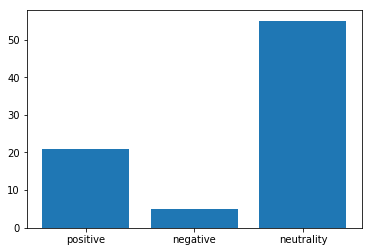

In [137]:
import matplotlib.pyplot as plt

dictionary = plt.figure()

D = {u'positive':po.sentiment, u'neutrality': nu.sentiment, u'negative':na.sentiment}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())



In [139]:
import requests
url="http://search.twitter.com/search.json?q=china"
result=requests.get(url)
better_result=result.json

In [141]:
better_result

<bound method Response.json of <Response [410]>>

# Search API

In [144]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)
search_results = api.search(q="Tainan", count=100)


In [146]:
len(search_results)

98

In [156]:
search_results[0].text

u'af o tainan ta atrasado q odiooo'

In [ ]:

{
    "created_at": "Thu Jul 28 00:08:39 +0000 2016",
    "in_reply_to_status_id": null,
    "id_str": "758454081656467456",
    "retweeted": false,
    "entities": {
        "hashtags": [
            {
                "text": "30secLL_bot",
                "indices": [
                    25,
                    37
                ]
            }
        ],
        "urls": [],
        "symbols": [],
        "media": [
            {
                "url": "https://t.co/oQjf1qKsDC",
                "id_str": "680158074653442048",
                "source_status_id": 680158389477875700,
                "source_user_id": 4017736032,
                "source_user_id_str": "4017736032",
                "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/680158074653442048/pu/img/UkJ-B_AqbC_vEOcY.jpg",
                "source_status_id_str": "680158389477875712",
                "sizes": {
                    "medium": {
                        "w": 600,
                        "h": 338,
                        "resize": "fit"
                    },
                    "small": {
                        "w": 340,
                        "h": 191,
                        "resize": "fit"
                    },
                    "thumb": {
                        "w": 150,
                        "h": 150,
                        "resize": "crop"
                    },
                    "large": {
                        "w": 1024,
                        "h": 576,
                        "resize": "fit"
                    }
                },
                "display_url": "pic.twitter.com/oQjf1qKsDC",
                "type": "photo",
                "id": 680158074653442000,
                "indices": [
                    38,
                    61
                ],
                "expanded_url": "http://twitter.com/30seclovelive/status/680158389477875712/video/1",
                "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/680158074653442048/pu/img/UkJ-B_AqbC_vEOcY.jpg"
            }
        ],
        "user_mentions": []
    },
    "possibly_sensitive": false,
    "in_reply_to_user_id_str": null,
    "coordinates": null,
    "retweet_count": 153,
    "contributors": null,
    "favorite_count": 228,
    "favorited": false,
    "in_reply_to_status_id_str": null,
    "source": "<a href=\"http://twittbot.net/\" rel=\"nofollow\">twittbot.net</a>",
    "in_reply_to_user_id": null,
    "user": {
        "default_profile": false,
        "id_str": "4017736032",
        "profile_background_tile": false,
        "following": false,
        "description": "30+ sec video bot / 30+ 秒 ビデオ bot | Love Live! • Love Live! Sunshine!! • μ's & Aqours seiyuu/声優 | This account no longer accepts requests | ENG only!",
        "name": "30+ sec of ラブライブ!",
        "profile_sidebar_border_color": "000000",
        "entities": {
            "description": {
                "urls": []
            }
        },
        "utc_offset": null,
        "statuses_count": 2821,
        "notifications": false,
        "verified": false,
        "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png",
        "profile_image_url": "http://pbs.twimg.com/profile_images/751165343968555009/DGbWpedO_normal.jpg",
        "default_profile_image": false,
        "profile_image_url_https": "https://pbs.twimg.com/profile_images/751165343968555009/DGbWpedO_normal.jpg",
        "geo_enabled": false,
        "follow_request_sent": false,
        "is_translation_enabled": false,
        "profile_use_background_image": false,
        "protected": false,
        "favourites_count": 0,
        "url": null,
        "followers_count": 31794,
        "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png",
        "profile_link_color": "E81C4F",
        "profile_text_color": "000000",
        "profile_banner_url": "https://pbs.twimg.com/profile_banners/4017736032/1464317692",
        "has_extended_profile": false,
        "is_translator": false,
        "profile_sidebar_fill_color": "000000",
        "created_at": "Sun Oct 25 22:20:47 +0000 2015",
        "contributors_enabled": false,
        "friends_count": 6,
        "id": 4017736032,
        "profile_background_color": "000000",
        "location": "音ノ木坂学院 / 浦の星女学院 ",
        "time_zone": null,
        "screen_name": "30seclovelive",
        "listed_count": 228,
        "lang": "en"
    },
    "place": null,
    "geo": null,
    "truncated": false,
    "in_reply_to_screen_name": null,
    "is_quote_status": false,
    "id": 758454081656467500,
    "text": "movie - hanayo vs. bread #30secLL_bot https://t.co/oQjf1qKsDC",
    "extended_entities": {
        "media": [
            {
                "url": "https://t.co/oQjf1qKsDC",
                "id_str": "680158074653442048",
                "source_status_id": 680158389477875700,
                "source_user_id": 4017736032,
                "source_user_id_str": "4017736032",
                "media_url_https": "https://pbs.twimg.com/ext_tw_video_thumb/680158074653442048/pu/img/UkJ-B_AqbC_vEOcY.jpg",
                "source_status_id_str": "680158389477875712",
                "sizes": {
                    "medium": {
                        "w": 600,
                        "h": 338,
                        "resize": "fit"
                    },
                    "small": {
                        "w": 340,
                        "h": 191,
                        "resize": "fit"
                    },
                    "thumb": {
                        "w": 150,
                        "h": 150,
                        "resize": "crop"
                    },
                    "large": {
                        "w": 1024,
                        "h": 576,
                        "resize": "fit"
                    }
                },
                "display_url": "pic.twitter.com/oQjf1qKsDC",
                "type": "video",
                "id": 680158074653442000,
                "indices": [
                    38,
                    61
                ],
                "additional_media_info": {
                    "monetizable": false,
                    "source_user": {
                        "default_profile": false,
                        "id_str": "4017736032",
                        "profile_background_tile": false,
                        "following": false,
                        "description": "30+ sec video bot / 30+ 秒 ビデオ bot | Love Live! • Love Live! Sunshine!! • μ's & Aqours seiyuu/声優 | This account no longer accepts requests | ENG only!",
                        "name": "30+ sec of ラブライブ!",
                        "profile_sidebar_border_color": "000000",
                        "entities": {
                            "description": {
                                "urls": []
                            }
                        },
                        "utc_offset": null,
                        "statuses_count": 2821,
                        "notifications": false,
                        "verified": false,
                        "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png",
                        "profile_image_url": "http://pbs.twimg.com/profile_images/751165343968555009/DGbWpedO_normal.jpg",
                        "default_profile_image": false,
                        "profile_image_url_https": "https://pbs.twimg.com/profile_images/751165343968555009/DGbWpedO_normal.jpg",
                        "geo_enabled": false,
                        "follow_request_sent": false,
                        "is_translation_enabled": false,
                        "profile_use_background_image": false,
                        "protected": false,
                        "favourites_count": 0,
                        "url": null,
                        "followers_count": 31794,
                        "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png",
                        "profile_link_color": "E81C4F",
                        "profile_text_color": "000000",
                        "profile_banner_url": "https://pbs.twimg.com/profile_banners/4017736032/1464317692",
                        "has_extended_profile": false,
                        "is_translator": false,
                        "profile_sidebar_fill_color": "000000",
                        "created_at": "Sun Oct 25 22:20:47 +0000 2015",
                        "contributors_enabled": false,
                        "friends_count": 6,
                        "id": 4017736032,
                        "profile_background_color": "000000",
                        "location": "音ノ木坂学院 / 浦の星女学院 ",
                        "time_zone": null,
                        "screen_name": "30seclovelive",
                        "listed_count": 228,
                        "lang": "en"
                    }
                },
                "video_info": {
                    "duration_millis": 30000,
                    "variants": [
                        {
                            "url": "https://video.twimg.com/ext_tw_video/680158074653442048/pu/pl/yOBp87ckwBL35I8e.m3u8",
                            "content_type": "application/x-mpegURL"
                        },
                        {
                            "url": "https://video.twimg.com/ext_tw_video/680158074653442048/pu/pl/yOBp87ckwBL35I8e.mpd",
                            "content_type": "application/dash+xml"
                        },
                        {
                            "url": "https://video.twimg.com/ext_tw_video/680158074653442048/pu/vid/1280x720/cZN0XuT_6u12nwak.mp4",
                            "content_type": "video/mp4",
                            "bitrate": 2176000
                        },
                        {
                            "url": "https://video.twimg.com/ext_tw_video/680158074653442048/pu/vid/640x360/-6cs96ywIwtM7-JP.mp4",
                            "content_type": "video/mp4",
                            "bitrate": 832000
                        },
                        {
                            "url": "https://video.twimg.com/ext_tw_video/680158074653442048/pu/vid/320x180/Spqi13GJkXZpU_zv.mp4",
                            "content_type": "video/mp4",
                            "bitrate": 320000
                        }
                    ],
                    "aspect_ratio": [
                        16,
                        9
                    ]
                },
                "expanded_url": "http://twitter.com/30seclovelive/status/680158389477875712/video/1",
                "media_url": "http://pbs.twimg.com/ext_tw_video_thumb/680158074653442048/pu/img/UkJ-B_AqbC_vEOcY.jpg"
            }
        ]
    },
    "lang": "in"
}


## Google API

Google APIs is a set of application programming interfaces (APIs) developed by Google which allow communication with Google Services and their integration to other services. Examples of these include Search, Gmail, Translate or Google Maps. Third-party apps can use these APIs to take advantage of or extend the functionality of the existing services.

The APIs provide functionality like analytics, machine learning as a service (the Prediction API) or access to user data (when permission to read the data is given). Another important example is an embedded Google map on a website, which can be achieved using the Static maps API,[1] Places API[2] or Google Earth API.[3]

## Free API

https://www.jianshu.com/p/d0ffe5f482dc

## 3. 資料爬蟲--從網站結構撈資料

### Scrape Websites with Python + Beautiful Soup 4 + Requests -- Coding with Python

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<img src="bsp.png">

In [178]:
import bs4
from urllib2 import urlopen
from bs4 import BeautifulSoup as soup

In [192]:
url="https://www.newegg.com/Product/ProductList.aspx?Submit=ENE&DEPA=0&Order=BESTMATCH&Description=graphics+card&ignorear=0&N=-1&isNodeId=1"

In [193]:
uClient=urlopen(url)
page_html=uClient.read()

In [194]:
uClient.close()

In [195]:
page_soup=page_soup=soup(page_html,"html.parser")

In [198]:
print(page_soup.title)

<title>graphics card - Newegg.com</title>


In [202]:
print(page_soup.h1)

<h1 class="page-title-text">"graphics card"</h1>


In [201]:
print(page_soup.p)

<p>Newegg.com - A great place to buy computers, computer parts, electronics, software, accessories, and DVDs online. With great prices, fast shipping, and top-rated customer service - Newegg shopping upgraded ™</p>


In [213]:
print(page_soup)

<!DOCTYPE HTML>

<html lang="en">
<head>
<script src="//assets.adobedtm.com/d2f967b83a0c92b19d9b572545fdbdc3d591f6f5/satelliteLib-389760a7bc4573d6b081d36f6782b59f3c8ffb54.js"></script>
<title>graphics card - Newegg.com</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="always" name="referrer"/>
<meta content="Newegg.com - graphics card" name="keywords"/>
<meta content="Newegg.com offers the best prices on computer products, laptop computers, LED LCD TVs, digital cameras, electronics, unlocked phones, office supplies, and more with fast shipping and top-rated customer service. Newegg shopping upgraded ™" name="description"/>
<meta content="https://c1.neweggimages.com/WebResource/Themes/2005/Nest/logo_424x210.png" property="og:image"/>
<meta content="Newegg.com offers the best prices on computer products, laptop computers, LED LCD TVs, digital cameras, electronics, unlocked phones, office supplies, and more with fast shipping and top-rated custome

In [205]:
page_soup.body.span

<span class="noCSS">Skip to:</span>

<img src="container.png">

# div is container need to loop og container to get all div

In [207]:
page_soup.body.span

<span class="noCSS">Skip to:</span>

In [214]:
containers=page_soup.findAll("div",{"class":"item-container"})

In [215]:
len(containers)

36

In [216]:
print(containers[0])

<div class="item-container ">
<!--product image-->
<a class="item-img" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;cm_re=graphics_card-_-14-137-054-_-Product">
<img alt="MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card" src="//c1.neweggimages.com/ProductImageCompressAll300/14-137-054-07.jpg" title="MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card"/>
</a>
<div class="item-info">
<!--brand info-->
<div class="item-branding">
<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" title="MSI"/>
</a>
<!--rating info-->
<a class="item-rating" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;SortField=0&amp;SummaryType=0&amp;PageSize=10&amp;SelectedRating=-1&amp;VideoOnlyMark=False&amp;ignorebbr=1

In [217]:
container=containers[0]
container.a

<a class="item-img" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;cm_re=graphics_card-_-14-137-054-_-Product">\n<img alt="MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card" src="//c1.neweggimages.com/ProductImageCompressAll300/14-137-054-07.jpg" title="MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card"/>\n</a>

In [219]:
print(container.div)

<div class="item-info">
<!--brand info-->
<div class="item-branding">
<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" title="MSI"/>
</a>
<!--rating info-->
<a class="item-rating" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;SortField=0&amp;SummaryType=0&amp;PageSize=10&amp;SelectedRating=-1&amp;VideoOnlyMark=False&amp;ignorebbr=1&amp;IsFeedbackTab=true#scrollFullInfo" title="Rating + 4"><i class="rating rating-4"></i><span class="item-rating-num">(83)</span></a>
</div>
<!--description info-->
<a class="item-title" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;cm_re=graphics_card-_-14-137-054-_-Product" title="View Details"><i class="icon-premier icon-premier-xsm"></i>MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card</a>
<!--promption info-->
<p class="ite

In [220]:
print(container.div.div.a)

<a class="item-brand" href="https://www.newegg.com/MSI/BrandStore/ID-1312">
<img alt="MSI" src="//c1.neweggimages.com/Brandimage_70x28//Brand1312.gif" title="MSI"/>
</a>


In [221]:
print(container.div.div.a.img["title"])

MSI


In [254]:
brand=[]
for container in containers:
    name=container.div.div.a.img["title"]
    brand.append(name)
    

In [258]:
brand

[u'MSI',
 u'GIGABYTE',
 u'EVGA',
 u'GIGABYTE',
 u'EVGA',
 u'EVGA',
 u'MSI',
 u'EVGA',
 u'Sapphire Tech',
 u'EVGA',
 u'PowerColor',
 u'MSI',
 u'ASUS',
 u'Sapphire Tech',
 u'GIGABYTE',
 u'EVGA',
 u'EVGA',
 u'MSI',
 u'EVGA',
 u'GIGABYTE',
 u'MSI',
 u'EVGA',
 u'EVGA',
 u'ZOTAC',
 u'ZOTAC',
 u'ASUS',
 u'ZOTAC',
 u'ASUS',
 u'ASUS',
 u'MSI',
 u'EVGA',
 u'MSI',
 u'GIGABYTE',
 u'GIGABYTE',
 u'MSI',
 u'GIGABYTE']

In [224]:
container.findAll("a",{'class':"item-title"})

[<a class="item-title" href="https://www.newegg.com/Product/Product.aspx?Item=N82E16814137054&amp;cm_re=graphics_card-_-14-137-054-_-Product" title="View Details"><i class="icon-premier icon-premier-xsm"></i>MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card</a>]

In [251]:
container.findAll("a",{'class':"item-title"})[0].text

u'GIGABYTE GeForce GT 1030 DirectX 12 GV-N1030OC-2GI 2GB 64-Bit GDDR5 PCI Express x16 ATX Video Card'

In [256]:
descriptions=[]
for container in containers:
    discrib=container.findAll("a",{'class':"item-title"})[0].text
    descriptions.append(discrib)

In [257]:
descriptions

[u'MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti GAMING X 4G 4GB 128-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card',
 u'GIGABYTE GeForce GTX 1080 Ti DirectX 12 GV-N108TGAMINGOC BLACK-11GD 11GB 352-Bit GDDR5X PCI Express 3.0 x16 ATX Video Card',
 u'EVGA GeForce GTX 1050 Ti GAMING, 04G-P4-6251-KR, 4GB GDDR5, DX12 OSD Support (PXOC)',
 u'GIGABYTE GeForce GTX 1060 DirectX 12 GV-N1060WF2OC-6GD 6GB 192-Bit GDDR5 PCI Express 3.0 x16 ATX Video Card',
 u'EVGA GeForce RTX 2080 XC GAMING, 08G-P4-2182-KR, 8GB GDDR6, Dual HDB Fans & RGB LED',
 u'EVGA GeForce RTX 2080 XC ULTRA GAMING, 08G-P4-2183-KR, 8GB GDDR6, Dual HDB Fans & RGB LED',
 u'MSI GeForce GTX 1060 DirectX 12 GTX 1060 GAMING X 6G 6GB 192-Bit GDDR5 PCI Express 3.0 x16 HDCP Ready ATX Video Card',
 u'EVGA GeForce GTX 1060 6GB SSC GAMING ACX 3.0, 6GB GDDR5, LED, DX12 OSD Support (PXOC), 06G-P4-6267-KR',
 u'Sapphire PULSE Radeon RX 580 8GB GDDR5 PCI-E Dual HDMI / DVI-D / Dual DP OC w/ Backplate (UEFI), 100411P8GOCL',
 u'EVGA GeForc

In [226]:
shipping_container=container.findAll("li",{'class':"price-ship"})

In [227]:
shipping_container

[<li class="price-ship">\r\n        $4.99 Shipping\r\n    </li>]

In [232]:
shipping_container[0].text.strip().split(" ")[0]

u'$4.99'

In [259]:
prices=[]
for container in containers:
    shipping_container=container.findAll("li",{'class':"price-ship"})
    price=shipping_container[0].text.strip().split(" ")[0]
    prices.append(price)

In [262]:
data={"brand":brand,"description":descriptions,"price":prices}

In [263]:
import pandas as pd
df=pd.DataFrame(data)
df

,brand,description,price
0,MSI,MSI GeForce GTX 1050 Ti DirectX 12 GTX 1050 Ti...,$4.99
1,GIGABYTE,GIGABYTE GeForce GTX 1080 Ti DirectX 12 GV-N10...,Free
2,EVGA,"EVGA GeForce GTX 1050 Ti GAMING, 04G-P4-6251-K...",$4.99
3,GIGABYTE,GIGABYTE GeForce GTX 1060 DirectX 12 GV-N1060W...,$4.99
4,EVGA,"EVGA GeForce RTX 2080 XC GAMING, 08G-P4-2182-K...",Free
5,EVGA,"EVGA GeForce RTX 2080 XC ULTRA GAMING, 08G-P4-...",Free
6,MSI,MSI GeForce GTX 1060 DirectX 12 GTX 1060 GAMIN...,$4.99
7,EVGA,"EVGA GeForce GTX 1060 6GB SSC GAMING ACX 3.0, ...",$4.99
8,Sapphire Tech,Sapphire PULSE Radeon RX 580 8GB GDDR5 PCI-E D...,$4.99
9,EVGA,"EVGA GeForce GTX 1080 Ti FTW3 GAMING, 11G-P4-6...",Free


https://www.yellowpages.com/search?search_terms=coffee&geo_location_terms=Los+Angeles%2C+CA

<img src="yp.png">

In [9]:
import bs4
from urllib2 import urlopen
from bs4 import BeautifulSoup 
urls=requests.get("https://www.yellowpages.com/search?search_terms=coffee&geo_location_terms=Los+Angeles%2C+CA")

In [10]:
soup=BeautifulSoup(urls.content)

/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"a7bc01046c","applicationID":"7804100,7804101","applicationTime":1316.059393,"transactionName":"MgRSZBMFXkMHVhZdWgtOc0USEF9dSUYQRA==","queueTime":0,"ttGuid":"b3a25fa6db1cb8","agentToken":null}; window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(e,t,n){function r(){}function o(e,t,n){return function(){return i(e,[f.now()].concat(u(arguments)),t?null:this,n),t?void 0:this}}var i=e("handle"),a=e(2),u=e(3),c=e("ee").get("tracer"),f=e("loader"),s=NREUM;"undefined"==typeof window

In [12]:
soup.findAll("a")

[<a class="site-logo" data-analytics='{"click_id":1083}' href="/" title="YellowPages"><svg height="60" viewbox="0 0 175 60" width="175" xmlns="http://www.w3.org/2000/svg"><rect height="60" id="logo-box" width="60"></rect><path d="M49,45H10.955v-4H49v4Z" id="logo-bar"></path><path d="M23.381,34.558c-1.172,3.288-2.716,4.355-5.828,4.355a8.379,8.379,0,0,1-3.078-.589V34.464a7.682,7.682,0,0,0,2.734.555c1.381,0,1.965-.7,1.965-1.6a4.213,4.213,0,0,0-.411-1.437c-0.279-.723-6.635-16.943-6.635-16.943H16.84l4.59,13.616h0.058L25.563,15.04h4.511ZM31.456,15.04h4.319v1.524h0.072a7.848,7.848,0,0,1,5.324-1.946c4.534,0,7.947,4.213,7.947,9.384,0,4.758-2.8,9.386-8.447,9.386a6.5,6.5,0,0,1-4.9-1.779V38.7H31.456V15.04ZM44.587,24c-0.035-2.585-1.219-5.42-4.475-5.42S35.671,21.416,35.634,24c0.037,2.584,1.22,5.419,4.478,5.419S44.552,26.585,44.587,24Z" id="logo-yp"></path><path d="M78.584,16.442H75.138V26.8H72.8V16.442H69.429V14.321h9.155v2.121Zm2.886-2.121v4.543A3.858,3.858,0,0,1,84.28,17.7a3.235,3.235,0,0,1,2.421.

In [13]:
containers=soup.findAll("div",{"class":"info"})

In [14]:
len(containers)

30

In [15]:
print(containers[0].prettify())

<div class="info">
 <h2 class="n">
  1.
  <a class="business-name" data-analytics='{"target":"name","feature_click":""}' href="/los-angeles-ca/mip/caffe-latte-1050840?lid=1050840" rel="">
   <span itemprop="name">
    Caffe Latte
   </span>
  </a>
 </h2>
 <div class="info-section info-primary" data-israteable="true" data-tripadvisor='{"rating":"4.5","count":"27"}'>
  <a class="rating hasExtraRating" data-analytics='{"click_id":22,"listing_features":"ratings"}' href="/los-angeles-ca/mip/caffe-latte-1050840?lid=1050840#yp-rating">
   <div class="result-rating four half ">
    <span class="count">
     (16)
    </span>
   </div>
  </a>
  <p class="adr" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
   <span class="street-address" itemprop="streetAddress">
    6254 Wilshire Blvd
   </span>
   <span class="locality" itemprop="addressLocality">
    Los Angeles,
   </span>
   <span itemprop="addressRegion">
    CA
   </span>
   <span itemprop="postalCode">
    900

In [16]:
len(containers[0])

5

In [18]:
containers[0].contents[0]

<h2 class="n">1.\xa0<a class="business-name" data-analytics='{"target":"name","feature_click":""}' href="/los-angeles-ca/mip/caffe-latte-1050840?lid=1050840" rel=""><span itemprop="name">Caffe Latte</span></a></h2>

In [19]:
name=[]
for item in containers:
    name.append(item.contents[0].find_all("a",{"class":"business-name"})[0].text)
   

In [20]:
name

[u'Caffe Latte',
 u'Bourgeois Pig',
 u'Beard Papa Sweet Cafe',
 u'Intelligentsia Coffee',
 u'The Downbeat Cafe',
 u'Overland Cafe',
 u'Habibi Cafe',
 u'Sabor Y Cultura',
 u'Groundwork Coffee Inc',
 u'Good Microbrew & Grill',
 u'The Standard Hollywood',
 u'Cafe Stella',
 u'Cafe Brasil',
 u'Swork Coffee',
 u'House Of Pies',
 u"Lulu's Cafe",
 u'Hotel Cafe',
 u'Ebar',
 u"Pann's Restaurant",
 u'Maxwell Cafe',
 u'Fratelli Cafe',
 u'Suehiro Cafe',
 u'Elf Cafe',
 u'Starbucks Coffee',
 u'A Votre Sante',
 u'Insomnia Cafe',
 u'Boba Loca',
 u'Haus by coffee hunter',
 u'Urth Caffe',
 u'The Coffee Bean & Tea Leaf']

In [21]:
address=[]
for item in containers:
    address.append(item.contents[1].find_all("p",{'class':"adr"})[0].text)
    print (item.contents[1].find_all("p",{'class':"adr"})[0].text)

6254 Wilshire BlvdLos Angeles, CA 90048
5931 Franklin AveLos Angeles, CA 90028
6801 Hollywood Blvd Ste 157Los Angeles, CA 90028
3922 W Sunset BlvdLos Angeles, CA 90029
1202 N Alvarado StLos Angeles, CA 90026
3601 Overland AveLos Angeles, CA 90034
923 Broxton AveLos Angeles, CA 90024
5625 Hollywood BlvdLos Angeles, CA 90028
1501 N Cahuenga BlvdLos Angeles, CA 90028
3725 W Sunset BlvdLos Angeles, CA 90026
8300 W Sunset BlvdLos Angeles, CA 90069
3932 W Sunset BlvdLos Angeles, CA 90029
10831 Venice BlvdLos Angeles, CA 90034
2160 Colorado BlvdLos Angeles, CA 90041
1869 N Vermont AveLos Angeles, CA 90027
7149 Beverly BlvdLos Angeles, CA 90036
1623 N Cahuenga BlvdLos Angeles, CA 90028
189 The Grove DrLos Angeles, CA 90036
6710 La Tijera BlvdLos Angeles, CA 90045
13329 W Washington BlvdLos Angeles, CA 90066
7200 Melrose AveLos Angeles, CA 90046
337 E 1st StLos Angeles, CA 90012
2135 W Sunset BlvdLos Angeles, CA 90026
4520 W Sunset BlvdLos Angeles, CA 90027
13016 San Vicente BlvdLos Angeles, CA

In [23]:
containers[0].contents[1]

<div class="info-section info-primary" data-israteable="true" data-tripadvisor='{"rating":"4.5","count":"27"}'><a class="rating hasExtraRating" data-analytics='{"click_id":22,"listing_features":"ratings"}' href="/los-angeles-ca/mip/caffe-latte-1050840?lid=1050840#yp-rating"><div class="result-rating four half "><span class="count">(16)</span></div></a><p class="adr" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress"><span class="street-address" itemprop="streetAddress">6254 Wilshire Blvd</span><span class="locality" itemprop="addressLocality">Los Angeles,\xa0</span><span itemprop="addressRegion">CA</span>\xa0<span itemprop="postalCode">90048</span></p><div class="phones phone primary" itemprop="telephone">(323) 936-5213</div></div>

In [24]:
containers[0].contents[2]

<div class="info-section info-secondary"><div class="categories"><a data-analytics='{"click_id":1171,"adclick":false,"listing_features":"category","events":""}' href="/los-angeles-ca/coffee-espresso-restaurants">Coffee &amp; Espresso Restaurants</a></div><div class="links"><a class="menu" data-analytics='{"click_id":1614,"target":"menus","listing_features":"menu-link"}' href="/listings/1050840/menu?lid=1050840">Menu</a></div></div>

In [25]:
types=[]
for item in containers:
    types.append(item.contents[2].find_all("div",{'class':"categories"})[0].text)
    print(item.contents[2].find_all("div",{'class':"categories"})[0].text)

Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee Shops
Coffee ShopsCaterersRestaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee ShopsAmerican Restaurants
Coffee & Espresso Restaurants
Coffee ShopsTake Out Restaurants
Coffee & Espresso Restaurants
Coffee ShopsBakeries
Coffee ShopsRestaurantsCaterers
Coffee ShopsRestaurants
Coffee Shops
Coffee & Espresso Restaurants
Coffee ShopsAmerican Restaurants
Coffee ShopsCoffee & Tea
Coffee ShopsRestaurants
Coffee ShopsHealth Food Restaurants
Coffee & Espresso Restaurants
Coffee ShopsTake Out Restaurants
Coffee ShopsCoffee & Tea
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants
Coffee & Espresso Restaurants


In [26]:
feedback=[]
for item in containers:
    feedback.append(item.contents[4].text)
     

In [27]:
feedback[0]

u'One of my favorite coffee places around the area. If you are a coffee person, I would like to recommend you to try  their Caramel Cappuccino. Beside\u2026'

In [29]:
import pandas as pd
data={"name":name,"types":types,"address":address,"feedback":feedback}
df2=pd.DataFrame(data)
df2

,address,feedback,name,types
0,"6254 Wilshire BlvdLos Angeles, CA 90048",One of my favorite coffee places around the ar...,Caffe Latte,Coffee & Espresso Restaurants
1,"5931 Franklin AveLos Angeles, CA 90028",I go there for tea at least once a week. They ...,Bourgeois Pig,Coffee & Espresso Restaurants
2,"6801 Hollywood Blvd Ste 157Los Angeles, CA 90028",I've told many people that this place has the ...,Beard Papa Sweet Cafe,Coffee & Espresso Restaurants
3,"3922 W Sunset BlvdLos Angeles, CA 90029",Line is long but it's really worth the wait. L...,Intelligentsia Coffee,Coffee & Espresso Restaurants
4,"1202 N Alvarado StLos Angeles, CA 90026","Lovely place, good music & a nice staff. One o...",The Downbeat Cafe,Coffee & Espresso Restaurants
5,"3601 Overland AveLos Angeles, CA 90034","They're doing construction in the front, so do...",Overland Cafe,Coffee Shops
6,"923 Broxton AveLos Angeles, CA 90024",The employee's there were fantastic! They were...,Habibi Cafe,Coffee ShopsCaterersRestaurants
7,"5625 Hollywood BlvdLos Angeles, CA 90028",I always visit the Pasadena location and the c...,Sabor Y Cultura,Coffee & Espresso Restaurants
8,"1501 N Cahuenga BlvdLos Angeles, CA 90028",This is one of the best coffee places in the c...,Groundwork Coffee Inc,Coffee & Espresso Restaurants
9,"3725 W Sunset BlvdLos Angeles, CA 90026",My girlfriend and I always eat and drink at go...,Good Microbrew & Grill,Coffee & Espresso Restaurants


https://pypi.org/project/censusgeocode/

In [97]:
import censusgeocode as cg
x=cg.onelineaddress('2081 Hillhurst AveLos Angeles, CA 90027')



In [98]:
x[0]

{u'addressComponents': {u'city': u'LOS ANGELES',
  u'fromAddress': u'2039',
  u'preDirection': u'',
  u'preQualifier': u'',
  u'preType': u'',
  u'state': u'CA',
  u'streetName': u'HILLHURST',
  u'suffixDirection': u'',
  u'suffixQualifier': u'',
  u'suffixType': u'AVE',
  u'toAddress': u'2099',
  u'zip': u'90027'},
 u'coordinates': {u'x': -118.28744, u'y': 34.109505},
 u'geographies': {u'2010 Census Blocks': [{u'AREALAND': 38307,
    u'AREAWATER': 0,
    u'BASENAME': u'2005',
    u'BLKGRP': u'2',
    u'BLOCK': u'2005',
    u'CENTLAT': u'+34.1088002',
    u'CENTLON': u'-118.2882500',
    u'COUNTY': u'037',
    u'FUNCSTAT': u'S',
    u'GEOID': u'060371891022005',
    u'INTPTLAT': u'+34.1088002',
    u'INTPTLON': u'-118.2882500',
    u'LSADC': u'BK',
    u'LWBLKTYP': u'L',
    u'MTFCC': u'G5040',
    u'NAME': u'Block 2005',
    u'OBJECTID': 10320255,
    u'OID': 210404056300251,
    u'STATE': u'06',
    u'SUFFIX': u'',
    u'TRACT': u'189102'}],
  u'Census Tracts': [{u'AREALAND': 624378,

comma-delimited longitude, latitude

In [93]:
x[0]["coordinates"]

{u'x': -77.03535, u'y': 38.898754}

In [95]:
x[0]["coordinates"]['x']

-77.03535

In [96]:
x[0]["coordinates"]['y']

38.898754

In [104]:
address=df2['address'].tolist()

In [109]:
import censusgeocode as cg
lat=[]
lang=[]
for add in address:
    try:
        x=cg.onelineaddress(add)
        lang.append(x[0]["coordinates"]['x'])
        lat.append(x[0]["coordinates"]['y'])
    except:
        lang.append('NaN')
        lat.append('NaN')
        

In [110]:
df2["lat"]=lat
df2["long"]=lang


In [113]:
writer = pd.ExcelWriter('output.xlsx')
df2.to_excel(writer,'Sheet1')
writer.save()

## PTT 爬文

https://www.ptt.cc/cls/7957
https://www.ptt.cc/bbs/L_PTTHealth/index2.html

https://carto.com/

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import sys
import re
import string
from collections import Counter
from textblob import TextBlob

res = requests.get('https://www.ptt.cc/bbs/Anti-Cancer/search?page='+ "1" + '&q=醫院', verify = False)
soup = bs(res.text, "html")
print soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>醫院 - Anti-Cancer - 批踢踢實業坊</title>
<link href="//images.ptt.cc/bbs/v2.25/bbs-common.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.25/bbs-custom.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print" rel="stylesheet" type="text/css"/>
</head>
<body>
<div id="topbar-container">
<div class="bbs-content" id="topbar">
<a href="/bbs/" id="logo">批踢踢實業坊</a>
<span>›</span>
<a class="board" href="/bbs/Anti-Cancer/index.html"><span class="board-label">看板 </span>Anti-Cancer</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html">聯絡資訊</a>
</div>
<

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
length=len('/bbs/Anti-Cancer/M.')

In [5]:
import requests
from bs4 import BeautifulSoup as bs


name = []
url = []
for page in range(1,80):
    page = str(page)
    res = requests.get('https://www.ptt.cc/bbs/Anti-Cancer/search?page='+ page + '&q=榮總', verify = False)
    soup = bs(res.text, "lxml")
    
    # 抓標題    
    # 抓網址
    for entry in soup.select('.r-ent'):
        t1 = soup.find_all('a')
        for t2 in t1:
            t3 = t2.get('href')
            t4 = str(t3)
            if t4[:length] == '/bbs/Anti-Cancer/M.':
                t5 = 'https://www.ptt.cc'+t4
                print(t5)
                url.append(t5)
                print t2.text
                name.append(t2.text)
           

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://www.ptt.cc/bbs/Anti-Cancer/M.1550676745.A.31F.html
[心得] 腎臟癌第一期（台北榮總）
https://www.ptt.cc/bbs/Anti-Cancer/M.1547373453.A.2B2.html
[問題] 請問台北榮總短期看護
https://www.ptt.cc/bbs/Anti-Cancer/M.1538721443.A.681.html
Re: [心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺 
https://www.ptt.cc/bbs/Anti-Cancer/M.1533189896.A.E32.html
[心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺 
https://www.ptt.cc/bbs/Anti-Cancer/M.1532915312.A.571.html
Re: [問題] 有人看過台中榮總滕傑林醫師嗎
https://www.ptt.cc/bbs/Anti-Cancer/M.1532705127.A.761.html
[問題] 有人看過台中榮總滕傑林醫師嗎
https://www.ptt.cc/bbs/Anti-Cancer/M.1515434134.A.AC0.html
[問題] 台北榮總掛號問題
https://www.ptt.cc/bbs/Anti-Cancer/M.1502709391.A.290.html
[問題] 台中榮總外科陳怡如甲狀腺切除評價
https://www.ptt.cc/bbs/Anti-Cancer/M.1494664227.A.5BD.html
[問題] 口腔癌 化療25次 榮總
https://www.ptt.cc/bbs/Anti-Cancer/M.1484759897.A.5E7.html
[問題] 基質瘤 台中榮總醫師推薦
https://www.ptt.cc/bbs/Anti-Cancer/M.1459962058.A.0C2.html
Re: [問題] 台中榮總外科劉嘯天好嗎
https://www.ptt.cc/bbs/Anti-Cancer/M.1456748774.A.75F.html
[問題] 推薦台中榮總 皮膚科醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.142891

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://www.ptt.cc/bbs/Anti-Cancer/M.1363449764.A.AC3.html
Re: [心得] 榮總乳房外科的不好經驗
https://www.ptt.cc/bbs/Anti-Cancer/M.1363410725.A.4AD.html
Re: [心得] 榮總乳房外科的不好經驗
https://www.ptt.cc/bbs/Anti-Cancer/M.1362063007.A.F6B.html
Re: [經驗] 這就是台北榮總的醫療品質
https://www.ptt.cc/bbs/Anti-Cancer/M.1360222405.A.B79.html
Re: [經驗] 這就是台北榮總的醫療品質
https://www.ptt.cc/bbs/Anti-Cancer/M.1360036735.A.A7C.html
[經驗] 這就是台北榮總的醫療品質
https://www.ptt.cc/bbs/Anti-Cancer/M.1359602210.A.805.html
Re: [問題] 台北榮總癌藥物治療科趙毅醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1350574662.A.03F.html
[問題] 要為了漫長的等待放棄榮總嗎
https://www.ptt.cc/bbs/Anti-Cancer/M.1350558988.A.A8C.html
Re: [問題] 台北榮總癌藥物治療科趙毅醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1333121656.A.C1F.html
[問題] 詢問台中榮總骨科及整外醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1332683020.A.49D.html
[問題] 短期住宿近榮總
https://www.ptt.cc/bbs/Anti-Cancer/M.1317575112.A.7DC.html
Re: [問題] 關於正子照影 原高雄榮總想請院外醫生分析
https://www.ptt.cc/bbs/Anti-Cancer/M.1317449077.A.579.html
[問題] 關於正子照影 原高雄榮總想請院外醫生分析
https://www.ptt.cc/bbs/Anti-Cance

Re: [經驗] 這就是台北榮總的醫療品質
https://www.ptt.cc/bbs/Anti-Cancer/M.1360036735.A.A7C.html
[經驗] 這就是台北榮總的醫療品質
https://www.ptt.cc/bbs/Anti-Cancer/M.1359602210.A.805.html
Re: [問題] 台北榮總癌藥物治療科趙毅醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1350574662.A.03F.html
[問題] 要為了漫長的等待放棄榮總嗎
https://www.ptt.cc/bbs/Anti-Cancer/M.1350558988.A.A8C.html
Re: [問題] 台北榮總癌藥物治療科趙毅醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1333121656.A.C1F.html
[問題] 詢問台中榮總骨科及整外醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1332683020.A.49D.html
[問題] 短期住宿近榮總
https://www.ptt.cc/bbs/Anti-Cancer/M.1317575112.A.7DC.html
Re: [問題] 關於正子照影 原高雄榮總想請院外醫生分析
https://www.ptt.cc/bbs/Anti-Cancer/M.1317449077.A.579.html
[問題] 關於正子照影 原高雄榮總想請院外醫生分析
https://www.ptt.cc/bbs/Anti-Cancer/M.1313245019.A.338.html
[問題] 高雄榮總血液腫瘤科的醫生哪個比較好?
https://www.ptt.cc/bbs/Anti-Cancer/M.1291706318.A.9F4.html
[新聞] 榮總最新研究 推拿幫倒忙 癌症竄全身
https://www.ptt.cc/bbs/Anti-Cancer/M.1286443334.A.150.html
[情報] 10/23 台北榮總「容易出血與瘀青的原因」衛教課程
https://www.ptt.cc/bbs/Anti-Cancer/M.1278274664.A.FB2.html
[問題] 榮總或和信？
https

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://www.ptt.cc/bbs/Anti-Cancer/M.1266392066.A.C56.html
Re: [問題] 榮總還是和信
https://www.ptt.cc/bbs/Anti-Cancer/M.1266325801.A.3A6.html
[問題] 榮總還是和信
https://www.ptt.cc/bbs/Anti-Cancer/M.1261038064.A.0F8.html
[問題] 台中榮總的鼻咽癌 主治醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1251878973.A.183.html
[情報] 9/19(六)高雄榮總「血癌防治與宣導」
https://www.ptt.cc/bbs/Anti-Cancer/M.1249281939.A.A8D.html
[問題] 請問台中榮總看肺癌...
https://www.ptt.cc/bbs/Anti-Cancer/M.1248939124.A.1C1.html
[分享] 高雄榮總安寧病房
https://www.ptt.cc/bbs/Anti-Cancer/M.1239497904.A.5D2.html
[分享] 台北榮總「癌症居家照顧技巧」網站
https://www.ptt.cc/bbs/Anti-Cancer/M.1237819510.A.DCF.html
Re: [問題] 請問台中榮總口腔癌權威
https://www.ptt.cc/bbs/Anti-Cancer/M.1235568019.A.213.html
Re: [問題] 請問台中榮總口腔癌權威
https://www.ptt.cc/bbs/Anti-Cancer/M.1232942188.A.669.html
[問題] 請問台中榮總口腔癌權威
https://www.ptt.cc/bbs/Anti-Cancer/M.1232064832.A.010.html
[自介] 有沒有在台中榮總療養的呢?
https://www.ptt.cc/bbs/Anti-Cancer/M.1228294730.A.514.html
[問題] 請推薦台中榮總 血液腫瘤科醫生？？
https://www.ptt.cc/bbs/Anti-Cancer/M.1222096325.A.6AE.html
Re: [

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://www.ptt.cc/bbs/Anti-Cancer/M.1174360306.A.12F.html
榮總報告出來了...
https://www.ptt.cc/bbs/Anti-Cancer/M.1173772993.A.75D.html
Re: [問題] 台北榮總的設備?
https://www.ptt.cc/bbs/Anti-Cancer/M.1173769858.A.6DC.html
Re: [問題] 台北榮總的設備?
https://www.ptt.cc/bbs/Anti-Cancer/M.1173680230.A.34C.html
[問題] 台北榮總的設備?
https://www.ptt.cc/bbs/Anti-Cancer/M.1172547789.A.49E.html
Re: 膽囊癌 考慮在榮總跟和信
https://www.ptt.cc/bbs/Anti-Cancer/M.1172291887.A.6F4.html
膽囊癌 考慮在榮總跟和信
https://www.ptt.cc/bbs/Anti-Cancer/M.1170608029.A.25F.html
[新聞] 高雄榮總研發乳房部分切除重建新術～傷口平整、僅一條疤 
https://www.ptt.cc/bbs/Anti-Cancer/M.1170517211.A.15A.html
Re: [問題] 被榮總踢出來了，請問能否再去別家醫院 …
https://www.ptt.cc/bbs/Anti-Cancer/M.1170129524.A.B8F.html
Re: [問題] 被榮總踢出來了，請問能否再去別家醫院 …
https://www.ptt.cc/bbs/Anti-Cancer/M.1170063303.A.43F.html
Re: [問題] 被榮總踢出來了，請問能否再去別家醫院 …
https://www.ptt.cc/bbs/Anti-Cancer/M.1169640054.A.27E.html
Re: [問題] 被榮總踢出來了，請問能否再去別家醫院 …
https://www.ptt.cc/bbs/Anti-Cancer/M.1169630924.A.E66.html
Re: [問題] 被榮總踢出來了，請問能否再去別家醫院 …
https://www.ptt.cc

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://www.ptt.cc/bbs/Anti-Cancer/M.1129645349.A.38D.html
[問題] 台中榮總乳癌沒自費的藥？？
https://www.ptt.cc/bbs/Anti-Cancer/M.1129028062.A.6F9.html
[問題] 請問台中榮總
https://www.ptt.cc/bbs/Anti-Cancer/M.1128519214.A.285.html
[問題] 長庚 張承能醫師 榮總 顏玉樹醫師
https://www.ptt.cc/bbs/Anti-Cancer/M.1128050217.A.828.html
[問題] 請大家幫幫忙～我想請問關於台大醫院、和信、榮總的權威醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1123989767.A.D6C.html
[問題] 請問台北榮總看肺癌的醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1120317228.A.9FA.html
Re: 請問台中榮總的醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1120044214.A.E9C.html
請問台中榮總的醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1119349815.A.744.html
[心得]台中榮總的醫師
https://www.ptt.cc/bbs/Anti-Cancer/M.1129645349.A.38D.html
[問題] 台中榮總乳癌沒自費的藥？？
https://www.ptt.cc/bbs/Anti-Cancer/M.1129028062.A.6F9.html
[問題] 請問台中榮總
https://www.ptt.cc/bbs/Anti-Cancer/M.1128519214.A.285.html
[問題] 長庚 張承能醫師 榮總 顏玉樹醫師
https://www.ptt.cc/bbs/Anti-Cancer/M.1128050217.A.828.html
[問題] 請大家幫幫忙～我想請問關於台大醫院、和信、榮總的權威醫生
https://www.ptt.cc/bbs/Anti-Cancer/M.1123989767.A.D6C.html
[問題

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

In [6]:
print len(name)
print len(url)

1664
1664


In [7]:
import pandas as pd
datas={'title':name,'url':url}
df=pd.DataFrame(datas)
df

,title,url
0,[心得] 腎臟癌第一期（台北榮總）,https://www.ptt.cc/bbs/Anti-Cancer/M.155067674...
1,[問題] 請問台北榮總短期看護,https://www.ptt.cc/bbs/Anti-Cancer/M.154737345...
2,Re: [心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺,https://www.ptt.cc/bbs/Anti-Cancer/M.153872144...
3,[心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺,https://www.ptt.cc/bbs/Anti-Cancer/M.153318989...
4,Re: [問題] 有人看過台中榮總滕傑林醫師嗎,https://www.ptt.cc/bbs/Anti-Cancer/M.153291531...
5,[問題] 有人看過台中榮總滕傑林醫師嗎,https://www.ptt.cc/bbs/Anti-Cancer/M.153270512...
6,[問題] 台北榮總掛號問題,https://www.ptt.cc/bbs/Anti-Cancer/M.151543413...
7,[問題] 台中榮總外科陳怡如甲狀腺切除評價,https://www.ptt.cc/bbs/Anti-Cancer/M.150270939...
8,[問題] 口腔癌 化療25次 榮總,https://www.ptt.cc/bbs/Anti-Cancer/M.149466422...
9,[問題] 基質瘤 台中榮總醫師推薦,https://www.ptt.cc/bbs/Anti-Cancer/M.148475989...


## 記得存檔

In [8]:
df.to_excel('ptt_output.xlsx')

In [9]:
import pandas as pd
import sys
import re
import string
from collections import Counter
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup as bs
df2 = pd.read_excel('ptt_output.xlsx')
df2.head()

,title,url
0,[心得] 腎臟癌第一期（台北榮總）,https://www.ptt.cc/bbs/Anti-Cancer/M.155067674...
1,[問題] 請問台北榮總短期看護,https://www.ptt.cc/bbs/Anti-Cancer/M.154737345...
2,Re: [心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺,https://www.ptt.cc/bbs/Anti-Cancer/M.153872144...
3,[心得] 近期掛號 台北 榮總 國泰 台大 胸腔 肺,https://www.ptt.cc/bbs/Anti-Cancer/M.153318989...
4,Re: [問題] 有人看過台中榮總滕傑林醫師嗎,https://www.ptt.cc/bbs/Anti-Cancer/M.153291531...


In [14]:
df['url'][0]

'https://www.ptt.cc/bbs/Anti-Cancer/M.1550676745.A.31F.html'

In [15]:
import requests
from bs4 import BeautifulSoup as bs

res = requests.get('https://www.ptt.cc/bbs/Anti-Cancer/M.1550676745.A.31F.html', verify = False)
print res.text

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>[心得] 腎臟癌第一期（台北榮總） - 看板 Anti-Cancer - 批踢踢實業坊</title>
<meta name="robots" content="all">
<meta name="keywords" content="Ptt BBS 批踢踢">
<meta name="description" content="前言
取之於抗癌版，回饋於抗癌版。如果不是因爲家人或親人遇到，我從來沒有機會踏入抗癌
版，這裡的文章與資訊帶給我們很多信心，希望藉由此次分享也讓大家更有希望。
正文
女友爸爸於2018年9月時在公司安排下前往醫院做健康檢查，在腹部超音波時檢查出腎臟
">
<meta property="og:site_name" content="Ptt 批踢踢實業坊">
<meta property="og:title" content="[心得] 腎臟癌第一期（台北榮總）">
<meta property="og:description" content="前言
取之於抗癌版，回饋於抗癌版。如果不是因爲家人或親人遇到，我從來沒有機會踏入抗癌
版，這裡的文章與資訊帶給我們很多信心，希望藉由此次分享也讓大家更有希望。
正文
女友爸爸於2018年9月時在公司安排下前往醫院做健康檢查，在腹部超音波時檢查出腎臟
">
<link rel="canonical" href="https://www.ptt.cc/bbs/Anti-Cancer/M.1550676745.A.31F.html">

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">
<link rel="sty

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [13]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get(df2["url"][0], verify = False)
soup = bs(res.text, "html")
t1 = soup.find_all('div',{"class":"bbs-screen bbs-content"})
print(t1)[0].text

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


作者DaCapo411226 (DaCapo)看板Anti-Cancer標題[心得] 腎臟癌第一期（台北榮總）時間Wed Feb 20 23:32:22 2019
前言

取之於抗癌版，回饋於抗癌版。如果不是因爲家人或親人遇到，我從來沒有機會踏入抗癌
版，這裡的文章與資訊帶給我們很多信心，希望藉由此次分享也讓大家更有希望。

正文

女友爸爸於2018年9月時在公司安排下前往醫院做健康檢查，在腹部超音波時檢查出腎臟
有一 5.7X4公分大小腫瘤，據醫生說腫瘤生長過程應該超過5年，但於兩年前健康檢查時
並沒有發現。

在檢查出腎臟腫瘤後我們相當難過，但積極尋找治療希望，經網路上資訊認識了榮總張延
驊醫師，榮總掛號並不是那麼好掛進去，因緣際會之下得知張醫師也有在振興醫院看診，
且相對來說較好掛號，於隔天立馬前往看診，並安排當週馬上於振興照CT確認腫瘤，並將
資料拿至榮總。

張醫師因病患眾多，於榮總網站上看的掛號資訊皆為全滿，但如果是第一次看診皆能當日
掛並排於最後時看診（也就是會等非常久，要有心理準備）

10/1號確診後於11/1號動刀，會由榮總於開刀前大約一個禮拜通知住院及開刀日期，於前
一天還有再次做一些檢查。

在照CT後張醫師判斷因腫瘤部分比較靠近中間血管及大腸（較可能為三期），詢問我們要
切整顆右腎還是局部切除，為求後續良好生活我們選擇讓張醫師做傳統局部切除手術。

手術時間含恢復大約為八個小時，於手術期間開刀房會呼叫並讓家屬看切下來的腫瘤，實
際上切下來的腫瘤大約為5X4公分大小，詳細必須將腫瘤送檢才會得知。

於術後第二天就能下床慢走，等順利排氣後就能開始慢慢進食，於第七天出院。

張醫師於第六天早上巡房時拿著報告說，很幸運沒碰到血管，是第一期，不用做後續治療
，三個月後再回診就可以了。

這四個月就好像一段旅程，充滿著不確定性與焦慮，但我們感激上天讓我們有這個機會順
利康復，徹徹底底的改變了我們的生活作息與飲食等等，並且更愛家人。

最後，想提醒大家健康檢查非常重要，為了您或您的家人請正視健檢的重要性，並且在所
有病理報告出來前不要自己嚇自己，保持正面積極的態度很重要，抗癌最重要的是心境，
太悲觀對病情不會有任何幫助。

感謝當時於版上私信詢問的版友數位，真的非常謝謝你們，也希望大家及家人親友們皆身
體健康，謝謝。

--
※ 發信站: 批踢踢實業坊

In [16]:
contents=[]
for url in df2.url.tolist():
    
    res = requests.get(str(url), verify = False)
    soup = bs(res.text, "lxml")
    t1 = soup.find_all('div',{"id":"main-container"})
    contents.append(t1[0].text)

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

In [17]:
len(contents)

1664

# 推文的萃取

In [18]:
res = requests.get(df2.url[0], verify = False)
soup = bs(res.text, "lxml")
t1 = soup.find_all('div',{"class":"push"})
print ("共有幾筆資料:",len(t1))
print ("==================================================")
push = []
for t2 in t1:
    t3 = t2.find_all('span',{"class":"f3 push-content"})
    print (t3[0].text[1:])
    push.append(t3[0].text[1:])

('\xe5\x85\xb1\xe6\x9c\x89\xe5\xb9\xbe\xe7\xad\x86\xe8\xb3\x87\xe6\x96\x99:', 3)
 祝福你女友父親恢復健康  大家都要做健康檢查 健康平安
 請問是良性變惡性嗎
 感謝分享 術後迎接更豐滿的人生~!


/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## get all push 資料

In [19]:
push=[]
for link in df2.url.tolist():
    res = requests.get(str(link), verify = False)
    soup = bs(res.text, "lxml")
    t1 = soup.find_all('div',{"class":"push"})
    local_push=[]
    for t2 in t1:
        t3 = t2.find_all('span',{"class":"f3 push-content"})
        local_push.append(t3[0].text[1:])
         
    text=" ".join(local_push)
    push.append(text)

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is be

In [20]:
len(push)

1664

## 儲存content and push 資料

In [21]:
df2["content"]=contents
df2["push"]=push
df2.to_excel('ptt_content.xlsx')

# Goal:

1. 選定主題（交通，觀光，都市犯罪，urban risk....)
2. 選四個區域，每個區域約 1 平方公里 或四個城市 進行比較
3. 抓取資料，必須包含至少一種政府公開資料及一種社群媒體資料，資料必須包含geodata
4. 找尋一個網站提供文字資料或是圖片資料擇一